# Parallel Coordinate Plot: Real Case Example -- Mean Climate (CMIP5 & 6)

- Generate a static image of Parallel coordinate plot using Matplotlib, for mean climate metrics.
- Author: Jiwoo Lee
- Last update: 2022.04

## 1. Read data from JSON files

Input data for parallel coordinate plot is expected as a set a (stacked or list of) 2-d numpy array(s) with list of strings for x and y axes labels. 

### 1.1 Provide PMP output JSON files

In [1]:
import glob
import os
import numpy as np
import requests

PMP output files downloadable from the [PMP results archive](https://github.com/PCMDI/pcmdi_metrics_results_archive). 

In [2]:
vars = ['pr', 'prw', 'psl', 'rlds', 'rltcre', 'rlus', 'rlut', 'rlutcs', 'rsds', 'rsdscs', 'rsdt', 'rstcre', 'rsut', 'rsutcs', 'sfcWind', 
        'ta-200', 'ta-850', 'tas', 'tauu', 'ts', 'ua-200', 'ua-850', 'va-200', 'va-850', 'zg-500']

In [3]:
json_dir = './json_files'
os.makedirs(json_dir, exist_ok=True)

In [4]:
mip = "cmip6"
exp = "historical"
data_version = "v20210811"

In [5]:
for var in vars:
    url = "https://raw.githubusercontent.com/PCMDI/pcmdi_metrics_results_archive/main/" + \
          "metrics_results/mean_climate/"+mip+"/"+exp+"/"+data_version+"/"+var+"."+mip+"."+exp+".regrid2.2p5x2p5."+data_version+".json"
    try:
        r = requests.get(url, allow_redirects=True)
        r.raise_for_status()
        filename = os.path.join(json_dir, url.split('/')[-1])
        with open(filename, 'wb') as file:
            file.write(r.content)
        print('Download completed:', filename)
    except:
        print(var, 'not exist')
        pass

Download completed: ./json_files/pr.cmip6.historical.regrid2.2p5x2p5.v20210811.json
Download completed: ./json_files/prw.cmip6.historical.regrid2.2p5x2p5.v20210811.json
Download completed: ./json_files/psl.cmip6.historical.regrid2.2p5x2p5.v20210811.json
Download completed: ./json_files/rlds.cmip6.historical.regrid2.2p5x2p5.v20210811.json
Download completed: ./json_files/rltcre.cmip6.historical.regrid2.2p5x2p5.v20210811.json
Download completed: ./json_files/rlus.cmip6.historical.regrid2.2p5x2p5.v20210811.json
Download completed: ./json_files/rlut.cmip6.historical.regrid2.2p5x2p5.v20210811.json
Download completed: ./json_files/rlutcs.cmip6.historical.regrid2.2p5x2p5.v20210811.json
Download completed: ./json_files/rsds.cmip6.historical.regrid2.2p5x2p5.v20210811.json
Download completed: ./json_files/rsdscs.cmip6.historical.regrid2.2p5x2p5.v20210811.json
Download completed: ./json_files/rsdt.cmip6.historical.regrid2.2p5x2p5.v20210811.json
Download completed: ./json_files/rstcre.cmip6.histor

In [6]:
mip = "cmip5"
exp = "historical"
data_version = "v20200429"

In [7]:
for var in vars:
    url = "https://raw.githubusercontent.com/PCMDI/pcmdi_metrics_results_archive/main/" + \
          "metrics_results/mean_climate/"+mip+"/"+exp+"/"+data_version+"/"+var+"."+mip+"."+exp+".regrid2.2p5x2p5."+data_version+".json"
    try:
        r = requests.get(url, allow_redirects=True)
        r.raise_for_status()
        filename = os.path.join(json_dir, url.split('/')[-1])
        with open(filename, 'wb') as file:
            file.write(r.content)
        print('Download completed:', filename)
    except:
        print(var, 'not exist')
        pass

Download completed: ./json_files/pr.cmip5.historical.regrid2.2p5x2p5.v20200429.json
prw not exist
Download completed: ./json_files/psl.cmip5.historical.regrid2.2p5x2p5.v20200429.json
Download completed: ./json_files/rlds.cmip5.historical.regrid2.2p5x2p5.v20200429.json
Download completed: ./json_files/rltcre.cmip5.historical.regrid2.2p5x2p5.v20200429.json
Download completed: ./json_files/rlus.cmip5.historical.regrid2.2p5x2p5.v20200429.json
Download completed: ./json_files/rlut.cmip5.historical.regrid2.2p5x2p5.v20200429.json
Download completed: ./json_files/rlutcs.cmip5.historical.regrid2.2p5x2p5.v20200429.json
Download completed: ./json_files/rsds.cmip5.historical.regrid2.2p5x2p5.v20200429.json
rsdscs not exist
Download completed: ./json_files/rsdt.cmip5.historical.regrid2.2p5x2p5.v20200429.json
Download completed: ./json_files/rstcre.cmip5.historical.regrid2.2p5x2p5.v20200429.json
Download completed: ./json_files/rsut.cmip5.historical.regrid2.2p5x2p5.v20200429.json
Download completed: 

Check JSON files

In [8]:
json_list_1 = sorted(glob.glob(os.path.join(json_dir, '*.cmip5.' + exp + '*' + '.json')))
json_list_2 = sorted(glob.glob(os.path.join(json_dir, '*.cmip6.' + exp + '*' + '.json')))
for i, json_file in enumerate(json_list_1):
    print(i+1, json_file.split('/')[-1])
for i, json_file in enumerate(json_list_2):
    print(i+1, json_file.split('/')[-1])

1 pr.cmip5.historical.regrid2.2p5x2p5.v20200429.json
2 psl.cmip5.historical.regrid2.2p5x2p5.v20200429.json
3 rlds.cmip5.historical.regrid2.2p5x2p5.v20200429.json
4 rltcre.cmip5.historical.regrid2.2p5x2p5.v20200429.json
5 rlus.cmip5.historical.regrid2.2p5x2p5.v20200429.json
6 rlut.cmip5.historical.regrid2.2p5x2p5.v20200429.json
7 rlutcs.cmip5.historical.regrid2.2p5x2p5.v20200429.json
8 rsds.cmip5.historical.regrid2.2p5x2p5.v20200429.json
9 rsdt.cmip5.historical.regrid2.2p5x2p5.v20200429.json
10 rstcre.cmip5.historical.regrid2.2p5x2p5.v20200429.json
11 rsut.cmip5.historical.regrid2.2p5x2p5.v20200429.json
12 rsutcs.cmip5.historical.regrid2.2p5x2p5.v20200429.json
13 sfcWind.cmip5.historical.regrid2.2p5x2p5.v20200429.json
14 ta-200.cmip5.historical.regrid2.2p5x2p5.v20200429.json
15 ta-850.cmip5.historical.regrid2.2p5x2p5.v20200429.json
16 tas.cmip5.historical.regrid2.2p5x2p5.v20200429.json
17 tauu.cmip5.historical.regrid2.2p5x2p5.v20200429.json
18 ua-200.cmip5.historical.regrid2.2p5x2p5.v20

### 1.2 Extract data from JSON files

Use `read_mean_clim_json_files` function to extract data from the above JSON files.

#### Parameters
- `json_list`: list of string, where each element is for path/file for PMP output JSON files
- `stats`: list of string, where each element is statistic to extract from the JSON.  Optional
- `regions`: list of string, where each element is region to extract from the JSON.  Optional
- `mip`: string, category for mip, e.g., 'cmip6'.  Optional
- `debug`: bool, default=False, enable few print statements to help debug

#### Returns
- `df_dict`: dictionary that has `[stat][season][region]` hierarchy structure storing pandas dataframe for metric numbers (Rows: models, Columns: variables (i.e., 2d array)
- `var_list`: list of string, all variables from JSON files
- `var_unit_list`: list of string, all variables and its units from JSON files
- `regions`: list of string, regions
- `stats`: list of string, statistics

In [9]:
from pcmdi_metrics.graphics import read_mean_clim_json_files

In [10]:
df_dict_1, var_list_1, var_unit_list_1, regions_1, stats_1 = read_mean_clim_json_files(
    json_list_1, mip="cmip5")

In [11]:
df_dict_2, var_list_2, var_unit_list_2, regions_2, stats_2 = read_mean_clim_json_files(
    json_list_2, mip="cmip6")

In [12]:
df_dict_1['rms_xy']['djf']['global']

,mip,model,run,model_run,pr,psl,rlds,rltcre,rlus,rlut,...,sfcWind,ta-200,ta-850,tas,tauu,ua-200,ua-850,va-200,va-850,zg-500
0,cmip5,ACCESS1-0,r1i1p1,ACCESS1-0_r1i1p1,1.675,214.726,12.092,7.414,9.776,10.246,...,144.348,2.052,1.604,2.631,0.048,4.804,4.752,4.891,4.691,51.956
1,cmip5,BCC-CSM1-1,r1i1p1,BCC-CSM1-1_r1i1p1,1.614,283.890,15.775,7.494,12.813,11.412,...,NaN,5.082,2.613,3.035,0.044,5.070,4.601,5.172,4.771,55.533
2,cmip5,BCC-CSM1-1-M,r1i1p1,BCC-CSM1-1-M_r1i1p1,1.694,336.701,13.843,11.521,11.988,14.018,...,NaN,NaN,NaN,3.060,0.040,NaN,NaN,NaN,NaN,NaN
3,cmip5,BNU-ESM,r1i1p1,BNU-ESM_r1i1p1,1.565,394.985,15.401,8.227,13.086,10.559,...,144.369,4.818,2.117,NaN,0.170,6.373,5.352,5.227,4.695,58.641
4,cmip5,CCSM4,r1i1p1,CCSM4_r1i1p1,1.352,347.099,14.336,8.286,11.144,9.998,...,NaN,3.039,1.440,2.101,0.035,5.644,4.943,5.109,4.710,31.367
5,cmip5,CESM1-FASTCHEM,r1i1p1,CESM1-FASTCHEM_r1i1p1,1.360,NaN,14.034,8.414,10.800,10.195,...,NaN,3.596,1.433,2.089,0.039,5.614,4.999,5.094,4.709,33.227
6,cmip5,CNRM-CM5-2,r1i1p1,CNRM-CM5-2_r1i1p1,1.462,203.218,16.949,9.598,13.784,10.465,...,144.245,5.331,1.910,2.815,0.034,6.345,4.748,4.905,4.715,69.485
7,cmip5,CSIRO-Mk3-6-0,r1i1p1,CSIRO-Mk3-6-0_r1i1p1,2.101,384.560,16.197,9.977,16.667,13.353,...,144.050,3.716,2.379,3.535,0.060,6.440,4.698,5.412,4.902,53.755
8,cmip5,CanCM4,r1i1p1,CanCM4_r1i1p1,1.542,257.617,16.490,NaN,13.480,10.904,...,NaN,2.539,1.884,2.514,0.071,4.993,4.718,5.410,4.728,64.971
9,cmip5,FGOALS-g2,r1i1p1,FGOALS-g2_r1i1p1,1.380,401.406,21.183,9.049,15.745,13.153,...,NaN,7.198,2.243,3.472,0.051,7.151,5.408,5.355,4.697,80.753


In [13]:
df_dict_2['rms_xy']['djf']['global']

,mip,model,run,model_run,pr,prw,psl,rlds,rltcre,rlus,...,ta-200,ta-850,tas,tauu,ts,ua-200,ua-850,va-200,va-850,zg-500
0,cmip6,ACCESS-CM2,r1i1p1,ACCESS-CM2_r1i1p1,1.661,139.039,245.952,11.552,8.519,10.560,...,2.717,1.495,2.508,0.040,2.770,4.174,1.421,1.689,0.799,26.053
1,cmip6,ACCESS-ESM1-5,r1i1p1,ACCESS-ESM1-5_r1i1p1,1.739,139.068,215.795,10.553,7.358,10.352,...,2.551,1.335,2.106,0.035,2.250,3.305,1.408,1.804,0.859,25.470
2,cmip6,AWI-CM-1-1-MR,r1i1p1,AWI-CM-1-1-MR_r1i1p1,1.604,139.179,170.936,11.231,7.957,8.496,...,1.847,1.074,1.414,0.028,1.609,2.483,1.251,1.586,0.711,16.738
3,cmip6,AWI-ESM-1-1-LR,r1i1p1,AWI-ESM-1-1-LR_r1i1p1,1.937,139.199,201.589,14.743,8.935,12.495,...,3.966,2.224,2.039,0.034,2.317,3.835,1.684,2.241,1.024,NaN
4,cmip6,BCC-CSM2-MR,r1i1p1,BCC-CSM2-MR_r1i1p1,1.700,139.251,237.180,13.025,7.370,11.014,...,NaN,NaN,2.669,0.034,2.585,NaN,NaN,NaN,NaN,NaN
5,cmip6,BCC-ESM1,r1i1p1,BCC-ESM1_r1i1p1,1.631,139.152,237.973,14.469,8.423,12.970,...,4.343,2.055,3.211,0.038,3.188,4.673,1.849,2.119,1.118,NaN
6,cmip6,CAMS-CSM1-0,r1i1p1,CAMS-CSM1-0_r1i1p1,1.721,139.513,182.945,19.644,8.397,14.631,...,NaN,NaN,3.462,NaN,3.858,NaN,NaN,NaN,NaN,NaN
7,cmip6,CESM2,r1i1p1,CESM2_r1i1p1,1.234,139.212,210.704,11.026,6.979,9.611,...,2.057,1.309,1.483,0.089,1.800,3.433,1.377,1.973,0.800,NaN
8,cmip6,CESM2-FV2,r1i1p1,CESM2-FV2_r1i1p1,1.397,139.161,242.138,12.376,7.835,10.690,...,3.026,1.987,1.892,0.090,2.142,4.017,2.061,2.204,0.988,NaN
9,cmip6,CESM2-WACCM,r1i1p1,CESM2-WACCM_r1i1p1,1.203,139.166,205.141,10.544,6.761,9.166,...,NaN,NaN,1.462,0.088,1.750,3.131,1.481,1.761,0.787,NaN


In [14]:
print('var_list_1:', var_list_1)
print('var_unit_list_1:', var_unit_list_1)

var_list_1: ['pr', 'psl', 'rlds', 'rltcre', 'rlus', 'rlut', 'rlutcs', 'rsds', 'rsdt', 'rstcre', 'rsut', 'rsutcs', 'sfcWind', 'ta-200', 'ta-850', 'tas', 'tauu', 'ua-200', 'ua-850', 'va-200', 'va-850', 'zg-500']
var_unit_list_1: ['pr [kg m-2 s-1]', 'psl [Pa]', 'rlds [W m-2]', 'rltcre [W m-2]', 'rlus [W m-2]', 'rlut [W m-2]', 'rlutcs [W m-2]', 'rsds [W m-2]', 'rsdt [W m-2]', 'rstcre [W m-2]', 'rsut [W m-2]', 'rsutcs [W m-2]', 'sfcWind [m s-1]', 'ta-200 [K]', 'ta-850 [K]', 'tas [K]', 'tauu [Pa]', 'ua-200 [m s-1]', 'ua-850 [m s-1]', 'va-200 [m s-1]', 'va-850 [m s-1]', 'zg-500 [m]']


In [15]:
print('var_list_2:', var_list_2)
print('var_unit_list_2:', var_unit_list_2)

var_list_2: ['pr', 'prw', 'psl', 'rlds', 'rltcre', 'rlus', 'rlut', 'rlutcs', 'rsds', 'rsdscs', 'rsdt', 'rstcre', 'rsut', 'rsutcs', 'sfcWind', 'ta-200', 'ta-850', 'tas', 'tauu', 'ts', 'ua-200', 'ua-850', 'va-200', 'va-850', 'zg-500']
var_unit_list_2: ['pr [N/A]', 'prw [N/A]', 'psl [N/A]', 'rlds [N/A]', 'rltcre [W m-2]', 'rlus [N/A]', 'rlut [N/A]', 'rlutcs [N/A]', 'rsds [N/A]', 'rsdscs [N/A]', 'rsdt [N/A]', 'rstcre [W m-2]', 'rsut [N/A]', 'rsutcs [N/A]', 'sfcWind [N/A]', 'ta-200 [N/A]', 'ta-850 [N/A]', 'tas [N/A]', 'tauu [N/A]', 'ts [N/A]', 'ua-200 [N/A]', 'ua-850 [N/A]', 'va-200 [N/A]', 'va-850 [N/A]', 'zg-500 [N/A]']


In [16]:
def common_member(a, b):   
    a_set = set(a)
    b_set = set(b)
     
    # check length
    if len(a_set.intersection(b_set)) > 0:
        return(list(a_set.intersection(b_set)))
    else:
        return("no common elements")

In [17]:
var_list = common_member(var_list_1, var_list_2)
var_list.remove('sfcWind')
var_list.remove('ta-850')
print(var_list)
print(len(var_list))

['psl', 'ua-200', 'rsut', 'rsdt', 'ua-850', 'rlutcs', 'rsds', 'pr', 'rlds', 'tauu', 'rltcre', 'rsutcs', 'zg-500', 'rlus', 'va-200', 'rstcre', 'rlut', 'tas', 'va-850', 'ta-200']
20


In [18]:
comp_list = ['mip', 'model', 'run'] + var_list

In [19]:
df_dict_1['rms_xy']['djf']['global'][comp_list]

,mip,model,run,psl,ua-200,rsut,rsdt,ua-850,rlutcs,rsds,...,rltcre,rsutcs,zg-500,rlus,va-200,rstcre,rlut,tas,va-850,ta-200
0,cmip5,ACCESS1-0,r1i1p1,214.726,4.804,14.394,2.696,4.752,5.279,17.895,...,7.414,7.544,51.956,9.776,4.891,13.139,10.246,2.631,4.691,2.052
1,cmip5,BCC-CSM1-1,r1i1p1,283.890,5.070,15.814,2.829,4.601,8.318,19.487,...,7.494,10.587,55.533,12.813,5.172,16.323,11.412,3.035,4.771,5.082
2,cmip5,BCC-CSM1-1-M,r1i1p1,336.701,NaN,18.258,2.808,NaN,6.240,21.292,...,11.521,11.875,NaN,11.988,NaN,18.636,14.018,3.060,NaN,NaN
3,cmip5,BNU-ESM,r1i1p1,394.985,6.373,16.300,3.353,5.352,7.984,20.132,...,8.227,14.852,58.641,13.086,5.227,18.152,10.559,NaN,4.695,4.818
4,cmip5,CCSM4,r1i1p1,347.099,5.644,17.388,2.666,4.943,5.524,20.225,...,8.286,15.446,31.367,11.144,5.109,19.902,9.998,2.101,4.710,3.039
5,cmip5,CESM1-FASTCHEM,r1i1p1,NaN,5.614,17.510,2.666,4.999,5.115,20.324,...,8.414,15.469,33.227,10.800,5.094,19.883,10.195,2.089,4.709,3.596
6,cmip5,CNRM-CM5-2,r1i1p1,203.218,6.345,19.664,2.529,4.748,9.369,21.924,...,9.598,12.435,69.485,13.784,4.905,18.969,10.465,2.815,4.715,5.331
7,cmip5,CSIRO-Mk3-6-0,r1i1p1,384.560,6.440,19.843,2.881,4.698,8.073,23.454,...,9.977,18.300,53.755,16.667,5.412,20.985,13.353,3.535,4.902,3.716
8,cmip5,CanCM4,r1i1p1,257.617,4.993,NaN,3.221,4.718,NaN,19.729,...,NaN,NaN,64.971,13.480,5.410,NaN,10.904,2.514,4.728,2.539
9,cmip5,FGOALS-g2,r1i1p1,401.406,7.151,17.128,3.262,5.408,12.394,18.891,...,9.049,12.456,80.753,15.745,5.355,16.290,13.153,3.472,4.697,7.198


In [20]:
df_dict_2['rms_xy']['djf']['global'][comp_list]

,mip,model,run,psl,ua-200,rsut,rsdt,ua-850,rlutcs,rsds,...,rltcre,rsutcs,zg-500,rlus,va-200,rstcre,rlut,tas,va-850,ta-200
0,cmip6,ACCESS-CM2,r1i1p1,245.952,4.174,13.652,1.919,1.421,6.691,16.770,...,8.519,7.651,26.053,10.560,1.689,12.723,10.991,2.508,0.799,2.717
1,cmip6,ACCESS-ESM1-5,r1i1p1,215.795,3.305,16.033,2.718,1.408,4.657,20.106,...,7.358,8.328,25.470,10.352,1.804,16.316,10.875,2.106,0.859,2.551
2,cmip6,AWI-CM-1-1-MR,r1i1p1,170.936,2.483,13.339,1.905,1.251,6.637,16.062,...,7.957,7.673,16.738,8.496,1.586,12.453,8.960,1.414,0.711,1.847
3,cmip6,AWI-ESM-1-1-LR,r1i1p1,201.589,3.835,15.867,1.949,1.684,9.159,18.647,...,8.935,7.980,NaN,12.495,2.241,14.628,11.630,2.039,1.024,3.966
4,cmip6,BCC-CSM2-MR,r1i1p1,237.180,NaN,15.608,3.031,NaN,6.027,20.055,...,7.370,12.667,NaN,11.014,NaN,15.127,9.984,2.669,NaN,NaN
5,cmip6,BCC-ESM1,r1i1p1,237.973,4.673,19.247,3.532,1.849,9.067,23.490,...,8.423,11.392,NaN,12.970,2.119,19.642,12.763,3.211,1.118,4.343
6,cmip6,CAMS-CSM1-0,r1i1p1,182.945,NaN,17.283,2.195,NaN,10.099,20.951,...,8.397,16.961,NaN,14.631,NaN,16.487,11.507,3.462,NaN,NaN
7,cmip6,CESM2,r1i1p1,210.704,3.433,12.554,2.682,1.377,6.385,15.446,...,6.979,7.431,NaN,9.611,1.973,13.025,7.908,1.483,0.800,2.057
8,cmip6,CESM2-FV2,r1i1p1,242.138,4.017,14.797,2.714,2.061,8.166,18.035,...,7.835,8.579,NaN,10.690,2.204,14.860,8.740,1.892,0.988,3.026
9,cmip6,CESM2-WACCM,r1i1p1,205.141,3.131,13.087,2.682,1.481,6.293,16.302,...,6.761,7.537,NaN,9.166,1.761,13.936,7.680,1.462,0.787,NaN


In [21]:
import pandas as pd

data_df = pd.concat([df_dict_1['rms_xyt']['ann']['global'][comp_list], df_dict_2['rms_xyt']['ann']['global'][comp_list]], axis=0)

In [22]:
data = data_df[var_list].to_numpy()
model_names = data_df['model'].tolist()
metric_names = var_list
model_highlights = ['E3SM-1-0', 'E3SM-1-1', 'E3SM-1-1-ECA']
print('data.shape:', data.shape)
print('len(metric_names): ', len(metric_names))
print('len(model_names): ', len(model_names))

data.shape: (74, 20)
len(metric_names):  20
len(model_names):  74


In [23]:
units_all = 'prw [kg m-2], pr [mm d-1], psl [Pa], rlds [W m-2], rsdscs [W m-2], rltcre [W m-2], rlus [W m-2], rlut [W m-2], rlutcs [W m-2], rsds [W m-2], rsdt [W m-2], rstcre [W m-2], rsus [W m-2], rsut [W m-2], rsutcs [W m-2], sfcWind [m s-1], zg-500 [m], ta-200 [K], ta-850 [K], tas [K], ts [K], ua-200 [m s-1], ua-850 [m s-1], uas [m s-1], va-200 [m s-1], va-850 [m s-1], vas [m s-1], tauu [Pa]'
units_all.split(', ')
var_unit_list = [] 

for var in var_list:
    found = False
    for var_units in units_all.split(', '):
        tmp1 = var_units.split(' [')[0]
        #print(var, tmp1)
        if tmp1 == var:
            unit = '[' + var_units.split(' [')[1]
            var_unit_list.append(var + '\n' + unit)
            found = True
            break
    if found is False:
        print(var, 'not found')

print('var_unit_list:', var_unit_list)

metric_names = var_unit_list

var_unit_list: ['psl\n[Pa]', 'ua-200\n[m s-1]', 'rsut\n[W m-2]', 'rsdt\n[W m-2]', 'ua-850\n[m s-1]', 'rlutcs\n[W m-2]', 'rsds\n[W m-2]', 'pr\n[mm d-1]', 'rlds\n[W m-2]', 'tauu\n[Pa]', 'rltcre\n[W m-2]', 'rsutcs\n[W m-2]', 'zg-500\n[m]', 'rlus\n[W m-2]', 'va-200\n[m s-1]', 'rstcre\n[W m-2]', 'rlut\n[W m-2]', 'tas\n[K]', 'va-850\n[m s-1]', 'ta-200\n[K]']


## 2. Plot

In [24]:
from pcmdi_metrics.graphics import parallel_coordinate_plot

Parameters
----------
- `data`: 2-d numpy array for metrics
- `metric_names`: list, names of metrics for individual vertical axes (axis=1)
- `model_names`: list, name of models for markers/lines (axis=0)
- `model_highlights`: list, default=None, List of models to highlight as lines
- `fig`: `matplotlib.figure` instance to which the parallel coordinate plot is plotted.  If not provided, use current axes or create a new one.  Optional.
- `ax`: `matplotlib.axes.Axes` instance to which the parallel coordinate plot is plotted.  If not provided, use current axes or create a new one.  Optional.
- `figsize`: tuple (two numbers), default=(15,5), image size
- `show_boxplot`: bool, default=True, show box and wiskers plot
- `show_violin`: bool, default=True, show violin plot
- `title`: string, default=None, plot title
- `identify_all_models`: bool, default=True. Show and identify all models using markers
- `xtick_labelsize`: number, fontsize for x-axis tick labels (optional)
- `ytick_labelsize`: number, fontsize for x-axis tick labels (optional)
- `colormap`: string, default='viridis', matplotlib colormap
- `logo_rect`: sequence of float. The dimensions [left, bottom, width, height] of the new Axes. All quantities are in fractions of figure width and height.  Optional
- `logo_off`: bool, default=False, turn off PMP logo

Return
------
- `fig`: matplotlib component for figure
- `ax`: matplotlib component for axis

Passed a quick QC


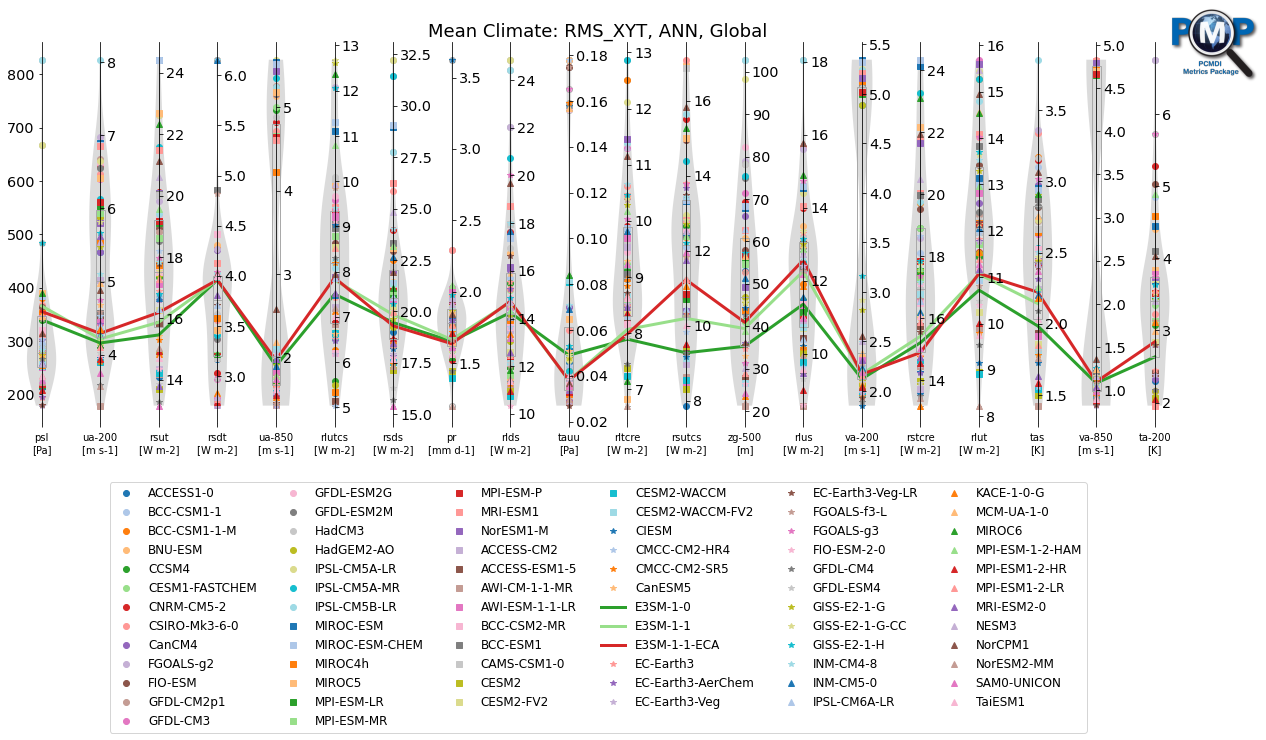

In [25]:
fig, ax = parallel_coordinate_plot(data, metric_names, model_names, model_highlights, 
                                   title='Mean Climate: RMS_XYT, ANN, Global', 
                                   figsize=(21, 7),
                                   colormap='tab20',
                                   xtick_labelsize=10,
                                   logo_rect=[0.8, 0.8, 0.15, 0.15])

In [26]:
# Save figure as an image file
fig.savefig('mean_clim_parallel_coordinate_plot_cmip56.png', facecolor='w', bbox_inches='tight')

In [27]:
cmip6_models = df_dict_2['rms_xy']['djf']['global']['model'].tolist()
cmip6_models

['ACCESS-CM2',
 'ACCESS-ESM1-5',
 'AWI-CM-1-1-MR',
 'AWI-ESM-1-1-LR',
 'BCC-CSM2-MR',
 'BCC-ESM1',
 'CAMS-CSM1-0',
 'CESM2',
 'CESM2-FV2',
 'CESM2-WACCM',
 'CESM2-WACCM-FV2',
 'CIESM',
 'CMCC-CM2-HR4',
 'CMCC-CM2-SR5',
 'CanESM5',
 'E3SM-1-0',
 'E3SM-1-1',
 'E3SM-1-1-ECA',
 'EC-Earth3',
 'EC-Earth3-AerChem',
 'EC-Earth3-Veg',
 'EC-Earth3-Veg-LR',
 'FGOALS-f3-L',
 'FGOALS-g3',
 'FIO-ESM-2-0',
 'GFDL-CM4',
 'GFDL-ESM4',
 'GISS-E2-1-G',
 'GISS-E2-1-G-CC',
 'GISS-E2-1-H',
 'INM-CM4-8',
 'INM-CM5-0',
 'IPSL-CM6A-LR',
 'KACE-1-0-G',
 'MCM-UA-1-0',
 'MIROC6',
 'MPI-ESM-1-2-HAM',
 'MPI-ESM1-2-HR',
 'MPI-ESM1-2-LR',
 'MRI-ESM2-0',
 'NESM3',
 'NorCPM1',
 'NorESM2-MM',
 'SAM0-UNICON',
 'TaiESM1']

Passed a quick QC
Models in the second group: ['ACCESS-CM2', 'ACCESS-ESM1-5', 'AWI-CM-1-1-MR', 'AWI-ESM-1-1-LR', 'BCC-CSM2-MR', 'BCC-ESM1', 'CAMS-CSM1-0', 'CESM2', 'CESM2-FV2', 'CESM2-WACCM', 'CESM2-WACCM-FV2', 'CIESM', 'CMCC-CM2-HR4', 'CMCC-CM2-SR5', 'CanESM5', 'E3SM-1-0', 'E3SM-1-1', 'E3SM-1-1-ECA', 'EC-Earth3', 'EC-Earth3-AerChem', 'EC-Earth3-Veg', 'EC-Earth3-Veg-LR', 'FGOALS-f3-L', 'FGOALS-g3', 'FIO-ESM-2-0', 'GFDL-CM4', 'GFDL-ESM4', 'GISS-E2-1-G', 'GISS-E2-1-G-CC', 'GISS-E2-1-H', 'INM-CM4-8', 'INM-CM5-0', 'IPSL-CM6A-LR', 'KACE-1-0-G', 'MCM-UA-1-0', 'MIROC6', 'MPI-ESM-1-2-HAM', 'MPI-ESM1-2-HR', 'MPI-ESM1-2-LR', 'MRI-ESM2-0', 'NESM3', 'NorCPM1', 'NorESM2-MM', 'SAM0-UNICON', 'TaiESM1']


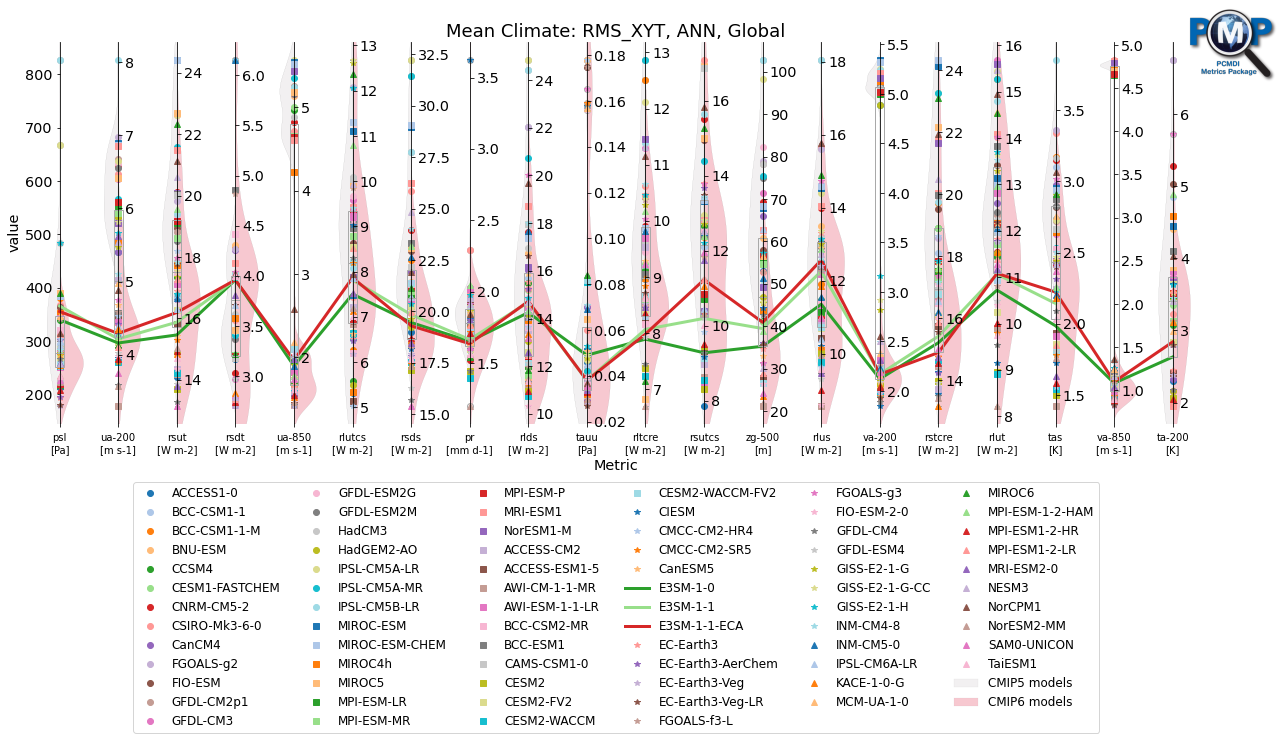

In [28]:
fig, ax = parallel_coordinate_plot(data, metric_names, model_names, model_highlights, 
                                   title='Mean Climate: RMS_XYT, ANN, Global', 
                                   figsize=(21, 7),
                                   colormap='tab20',
                                   xtick_labelsize=10,
                                   logo_rect=[0.8, 0.8, 0.15, 0.15],
                                   model_names2=cmip6_models,
                                   group1_name='CMIP5 models',
                                   group2_name='CMIP6 models',                       
                                  )